# Bank Churn Prediction

In [206]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap  
from statistics import mean

from scipy.stats import chi2_contingency 
from sklearn.pipeline import Pipeline

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
# !pip install xgboost
from xgboost import XGBClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, PrecisionRecallDisplay
from sklearn.feature_selection import RFE, f_classif as fs

# !pip install lime
from lime import lime_tabular

import time

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [221]:
df = pd.read_csv('bankchurn.csv')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print('\n\n',df[i].value_counts())



 Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64


 France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64


 Male      5457
Female    4543
Name: Gender, dtype: int64


In [222]:
# df['Geography'].mask(df['Geography'] == 'espanio', 0, inplace=True)
replace_values = {'espanio' : 'Spain', 'spain' : 'Spain', 'france' : 'France' , 'fra' : 'France', 'ger' : 'Germany', 'germany' : 'Germany', 'gernamy' : 'Germany', 'GERMANY' : 'Germany'}                                                                                          
df = df.replace({"Geography": replace_values})  

In [153]:
df['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [223]:
df.drop(['CustomerId', 'Surname'], axis = 1, inplace = True)

###### 

### Data visuallization

In [224]:
for i in df.columns.difference(['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']):
    if df[i].dtypes == 'object':
        df[i] = df[i].astype('category')

In [213]:
df1 = df[(df.Exited == 0)]
df2 = df[(df.Exited == 1)]

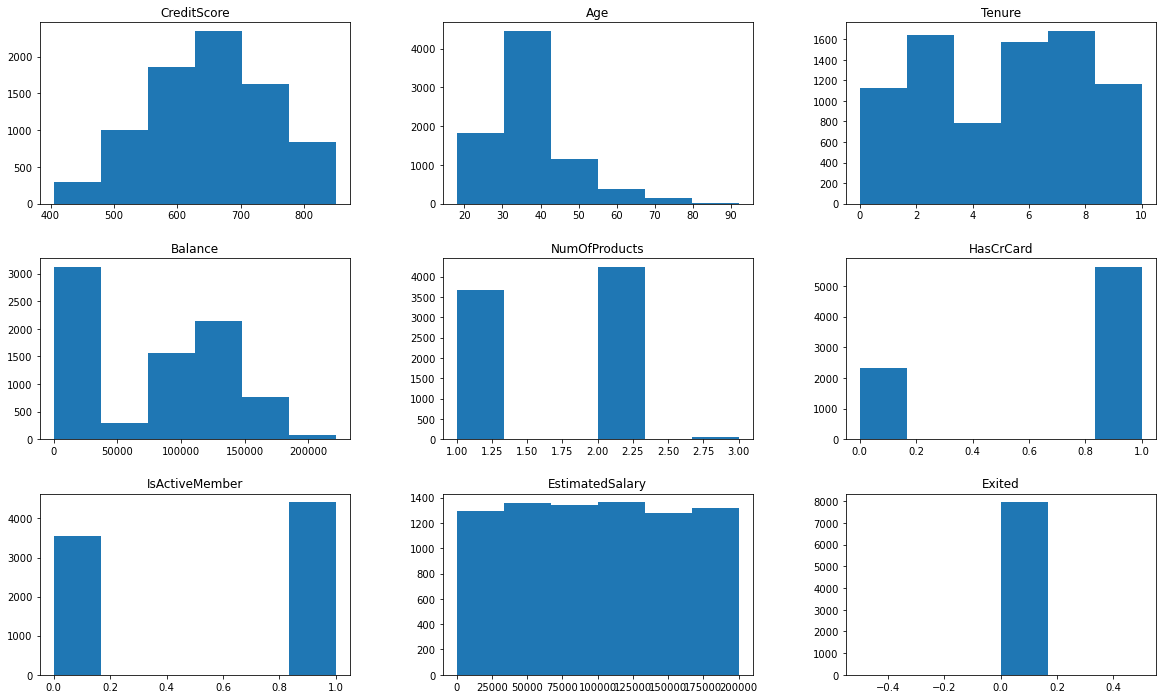

In [214]:
plt.rcParams["figure.figsize"] = [20,12]
df1.hist(bins = 6, grid = False);
# plt.grid(False);

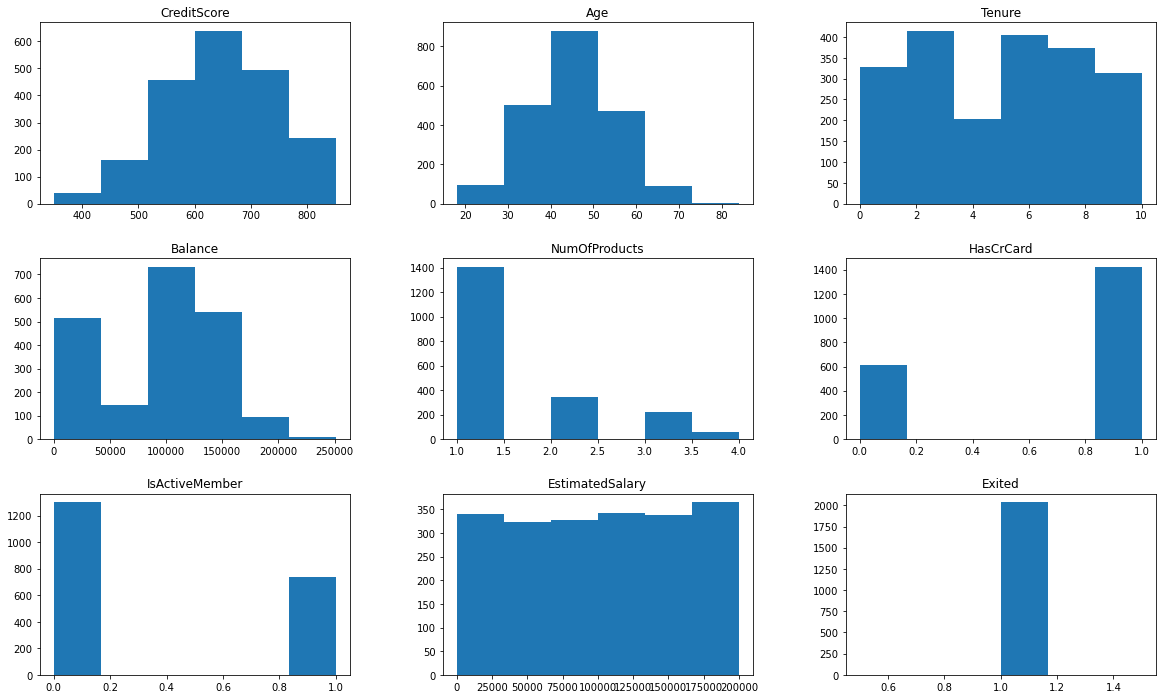

In [215]:
plt.rcParams["figure.figsize"] = [20,12]
df2.hist(bins = 6, grid = False);
# plt.grid(False);

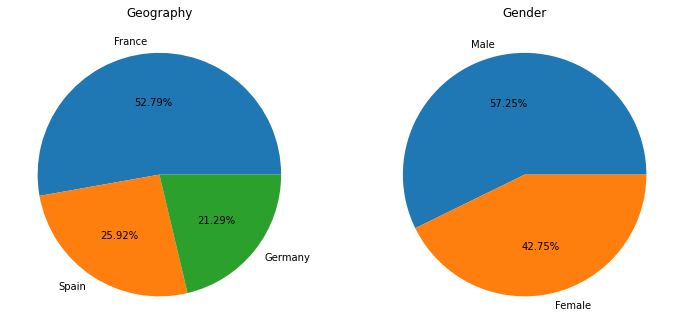

In [217]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
ax1.set_title('Geography')
percentage = df1['Geography'].value_counts()
label = list(df1['Geography'].value_counts().index)
ax1.pie(percentage, labels = label, autopct = '%0.2f%%')

ax2.set_title('Gender')
percentage = df1['Gender'].value_counts()
label = list(df1['Gender'].value_counts().index)
ax2.pie(percentage, labels = label, autopct = '%0.2f%%')

plt.show();

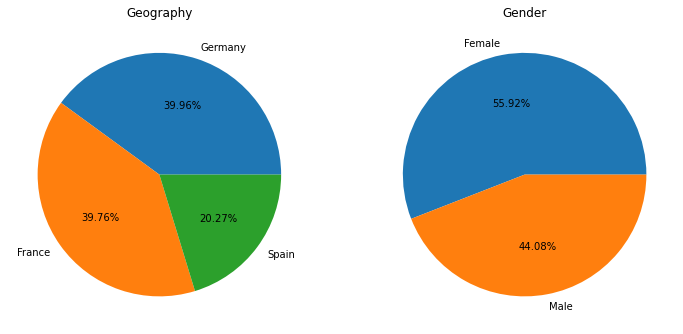

In [216]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
ax1.set_title('Geography')
percentage = df2['Geography'].value_counts()
label = list(df2['Geography'].value_counts().index)
ax1.pie(percentage, labels = label, autopct = '%0.2f%%')

ax2.set_title('Gender')
percentage = df2['Gender'].value_counts()
label = list(df2['Gender'].value_counts().index)
ax2.pie(percentage, labels = label, autopct = '%0.2f%%')

plt.show();

In [12]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [166]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

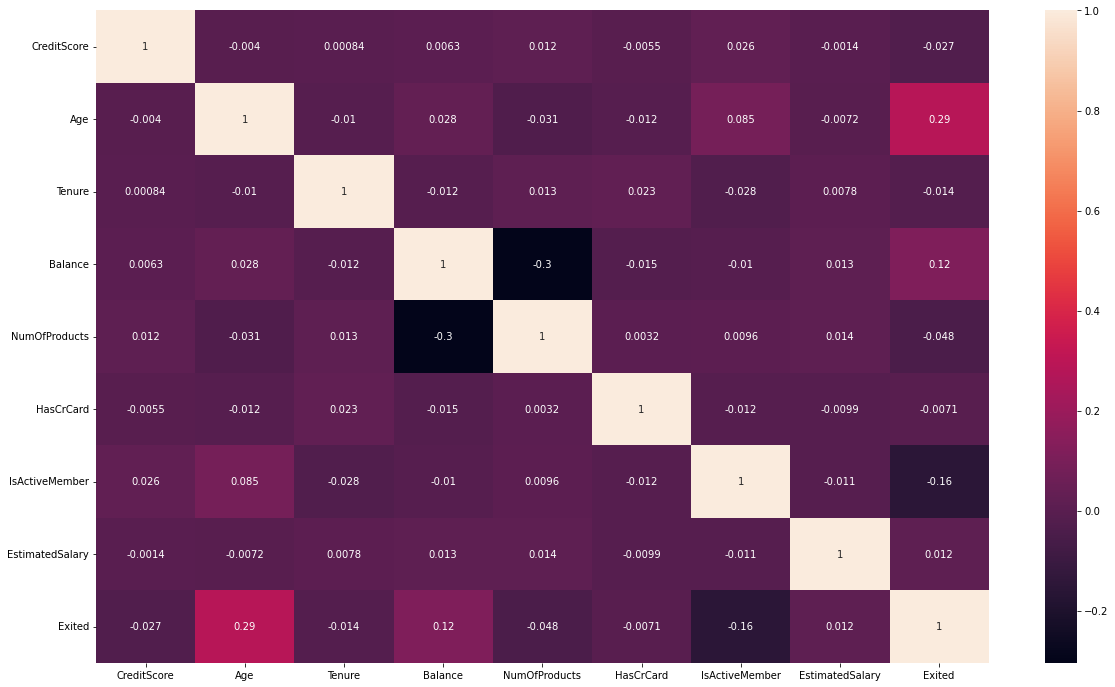

In [167]:
sb.heatmap(df.corr(), annot = True);

In [191]:
chi_sq = pd.crosstab(df.Geography, df.Gender, margins=True)
chi_sq

Gender,Female,Male,All
Geography,,,
France,2261,2753,5014
Germany,1193,1316,2509
Spain,1089,1388,2477
All,4543,5457,10000


In [190]:
value = np.array([chi_sq.iloc[0][0:5].values,
                  chi_sq.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(4.058819106458183, 0.13141309068094717, 2)


In [227]:
label_encoder = preprocessing.LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'category':
        df[i] = label_encoder.fit_transform(df[i])
    else:
        continue

###### 

### Feature selection

In [238]:
X = df.drop(['Exited','Geography', 'Gender'], axis = 1)
y = df['Exited']

features = X.columns
fscore, pvalue = fs(X,y)
df_feature = pd.DataFrame({'features' : features,
                  'score' : fscore,
                  'pvalue' : pvalue})
df_feature = df_feature.sort_values('score', ascending = False)
df_feature

,features,score,pvalue
1,Age,886.063275,1.239931e-186
6,IsActiveMember,249.800794,1.348269e-55
3,Balance,142.473832,1.275563e-32
4,NumOfProducts,22.915223,1.717333e-06
0,CreditScore,7.344522,6.738214e-03
2,Tenure,1.960164,1.615268e-01
7,EstimatedSalary,1.463262,2.264404e-01
5,HasCrCard,0.509401,4.754149e-01


###### 

### Split data

In [89]:
df = df[['Age', 'IsActiveMember', 'Balance', 'Gender', 'NumOfProducts' ,'Geography', 'CreditScore', 'Exited']]
print('Size of dataset: ', df.shape)

X = df.drop(columns = 'Exited', axis = 1)
y = df['Exited']

df_train, df_test = train_test_split(df, train_size = 0.7)

print('\nSize of training dataset: ', df_train.shape)
print('\nSize of test dataset: ', df_test.shape)

X_train = df_train.drop(columns = 'Exited', axis = 1)
y_train = df_train['Exited']
X_test = df_test.drop(columns = 'Exited', axis = 1)
y_test = df_test['Exited']
print('\nSize of independent training dataset (X_train): ', X_train.shape)
print('\nSize of dependent training dataset (y_train): ', y_train.shape)
print('\nSize of independent testing dataset (X_test): ', X_test.shape)
print('\nSize of dependent testing dataset (y_test): ', y_test.shape)

Size of dataset:  (10000, 8)

Size of training dataset:  (7000, 8)

Size of test dataset:  (3000, 8)

Size of independent training dataset (X_train):  (7000, 7)

Size of dependent training dataset (y_train):  (7000,)

Size of independent testing dataset (X_test):  (3000, 7)

Size of dependent testing dataset (y_test):  (3000,)


###### 

### Model building, training and evaluating its performance

In [17]:
np.random.seed(42)
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    level0.append(('rf', RandomForestClassifier()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators = level0, final_estimator = level1, cv = 5)
    return model



Minimum error:- 0.205 at K = 14


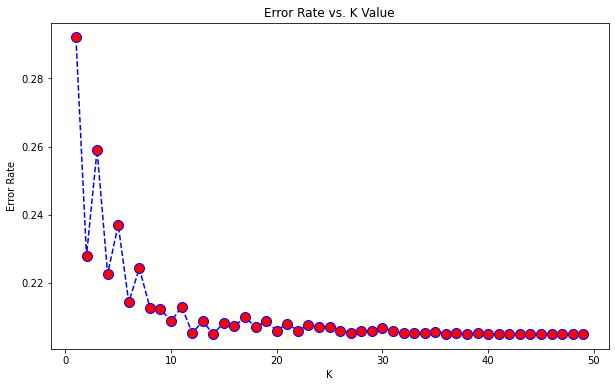

In [18]:
error_rate = []
for i in range(1,50):
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("\n\nMinimum error:-", min(error_rate),"at K =", error_rate.index(min(error_rate))+1)

In [19]:
# X_train1 = X_train[['Age', 'Balance', 'CreditScore']]
# X_train1

In [20]:
# df2 = df.columns.difference(['Age', 'Balance', 'CreditScore'])
# df2


 LogisticRegression()
f1 Score (train): mean = (0.759), min = (0.742), max = (0.777), stdev = (0.010)
f1 Score (test): 0.7210
Time taken = 0.073979s

 GaussianNB()
f1 Score (train): mean = (0.793), min = (0.781), max = (0.814), stdev = (0.011)
f1 Score (test): 0.7206
Time taken = 0.016165s

 KNeighborsClassifier(n_neighbors=14)
f1 Score (train): mean = (0.825), min = (0.814), max = (0.838), stdev = (0.006)
f1 Score (test): 0.7128
Time taken = 0.031411s

 SVC()
f1 Score (train): mean = (0.833), min = (0.819), max = (0.842), stdev = (0.006)
f1 Score (test): 0.7068
Time taken = 3.628064s

 DecisionTreeClassifier()
f1 Score (train): mean = (0.802), min = (0.792), max = (0.812), stdev = (0.008)
f1 Score (test): 0.8055
Time taken = 0.065592s

 RandomForestClassifier()
f1 Score (train): mean = (0.850), min = (0.832), max = (0.863), stdev = (0.009)
f1 Score (test): 0.8499
Time taken = 1.657941s

 BaggingClassifier(base_estimator=DecisionTreeClassifier())
f1 Score (train): mean = (0.840), min 

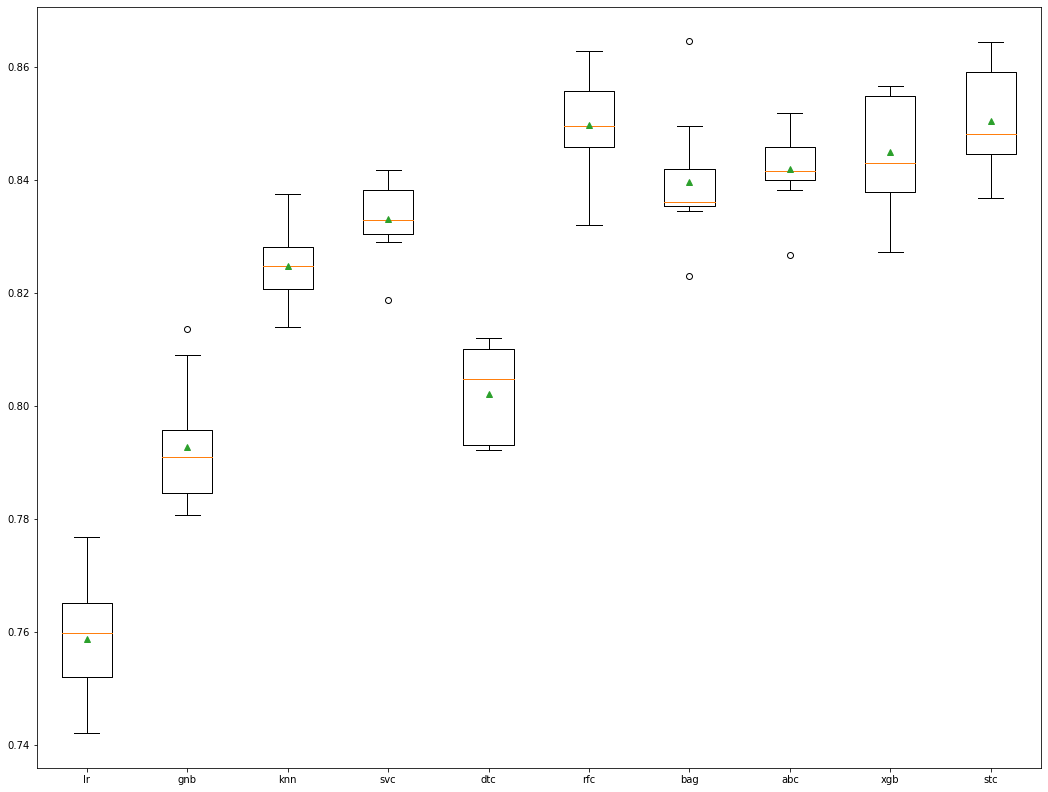

Threshold: ROC AUC = 0.500
RLR: ROC AUC = 0.666
GNB: ROC AUC = 0.745
KNN: ROC AUC = 0.595
Decision Tree: ROC AUC = 0.694
Random Forest: ROC AUC = 0.831
Bagging: ROC AUC = 0.794
ADABoosting: ROC AUC = 0.847
XGB-Boosting: ROC AUC = 0.829
Stacking: ROC AUC = 0.834


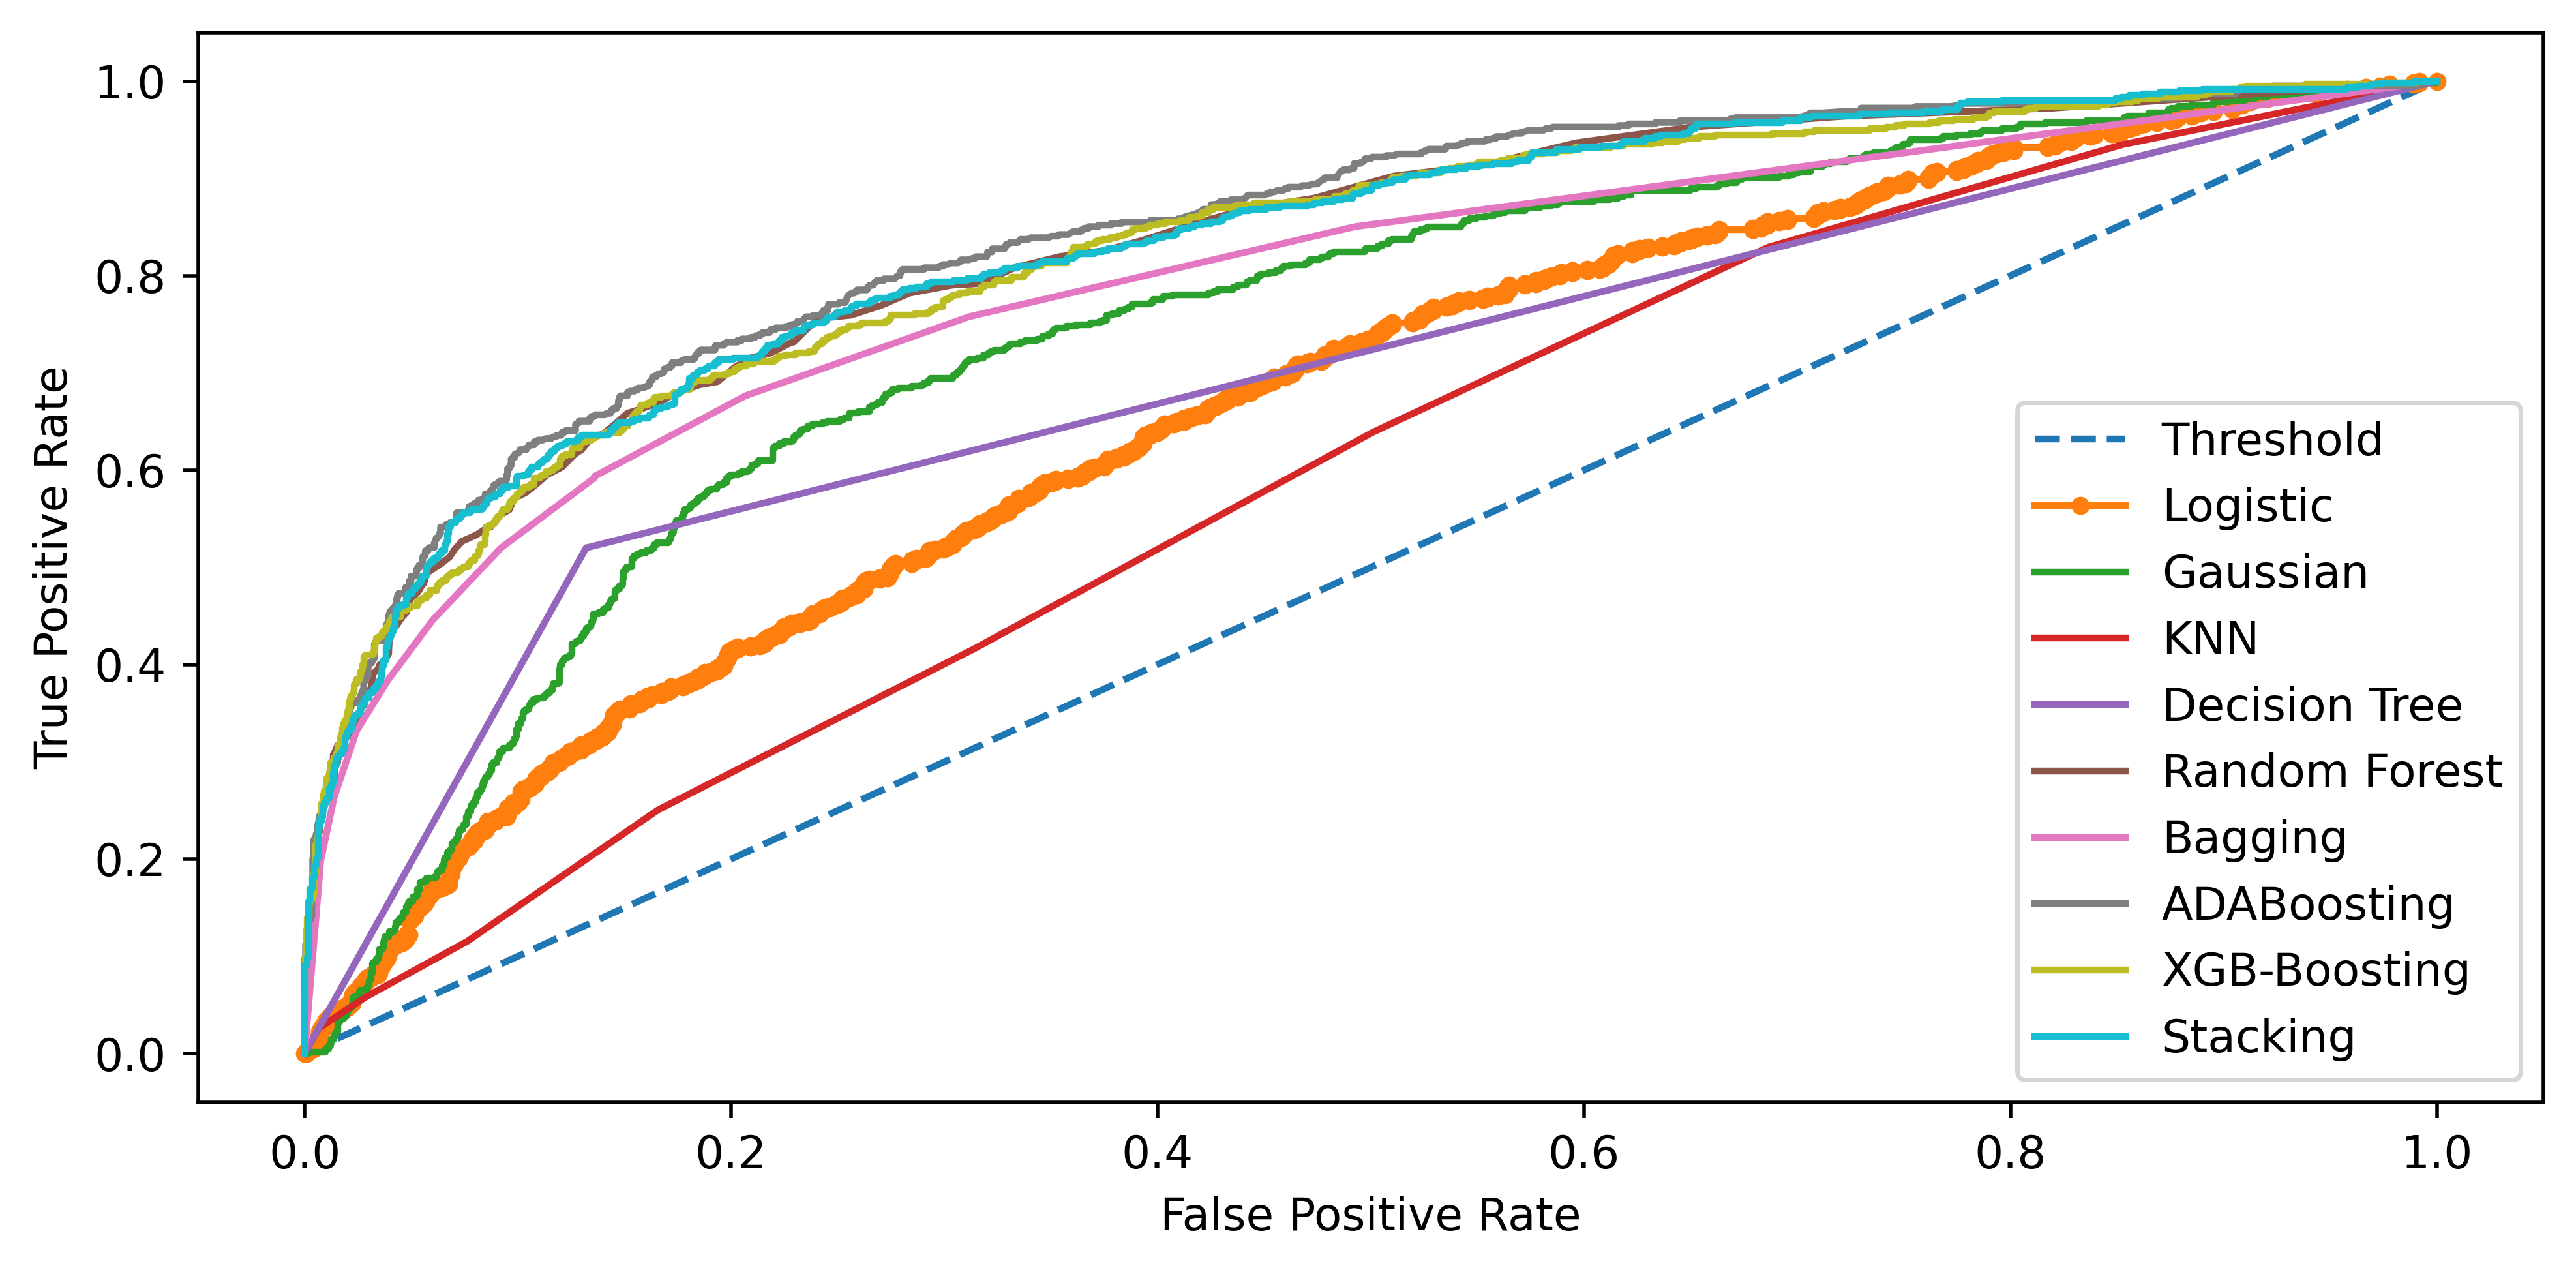

In [21]:
#########################################################################################################################
# model building
lr = LogisticRegression()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors = error_rate.index(min(error_rate))+1)
svc = SVC()
dtc = DecisionTreeClassifier() 
rfc = RandomForestClassifier()
bag = BaggingClassifier(base_estimator = dtc)
abc = AdaBoostClassifier()
xgb = XGBClassifier()
# cat = CatBoostClassifier()
stc = get_stacking()
l = [lr, gnb, knn, svc, dtc, rfc, bag, abc, xgb, stc]
names = ['lr','gnb', 'knn', 'svc', 'dtc', 'rfc', 'bag', 'abc', 'xgb', 'stc']
results, mean_results, p, time_taken, f1_test = list(), list(), list(), list(), list()

#########################################################################################################################
# model fitting, cross-validating, evaluating performance
def algo(model):
    print('\n', i)
    pipe = Pipeline([('scaler', MinMaxScaler()), ('model', model)])
    t0 = time.time()
    pipe.fit(X_train, y_train)
    t1 = time.time()
    cv = StratifiedKFold(n_splits = 10)
    train_n_scores = cross_val_score(pipe, X_train, y_train, scoring = 'f1_weighted', cv = cv, n_jobs = -1, error_score = 'raise')
    results.append(train_n_scores)
    mean_results.append(mean(train_n_scores))
    print('f1 Score (train): mean = (%.3f), min = (%.3f), max = (%.3f), stdev = (%.3f)' % (mean(train_n_scores), min(train_n_scores), max(train_n_scores), np.std(train_n_scores)))
    y_pred = cross_val_predict(model, X_train, y_train, cv = cv)
    p.append(y_pred)
    f1 = f1_score(y_train, y_pred, average = 'weighted')
    f1_test.append(f1)
    print('f1 Score (test): %.4f' % (f1))
    t = t1 - t0
    print("Time taken = %.6fs" % (t))
    time_taken.append(t)
    
for i in l:
    algo(i)
    
#########################################################################################################################
# plot model performance for comparison
fig = plt.subplots(figsize = (18, 14))
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

#########################################################################################################################
# calculate roc curve
def fit_model(model):
    model.fit(X_train, y_train)

for i in l:
    fit_model(i)
    
y_pred_lr = lr.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# ns_probs

# predict probabilities
lr_probs = lr.predict_proba(X_test)
gnb_probs = gnb.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
# svc_probs = svc.predict_proba(X_test)
dtc_probs = dtc.predict_proba(X_test)
rfc_probs = rfc.predict_proba(X_test)
bag_probs = bag.predict_proba(X_test)
abc_probs = abc.predict_proba(X_test)
xgb_probs = xgb.predict_proba(X_test)
stc_probs = stc.predict_proba(X_test)
# lr_probs

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
gnb_probs = gnb_probs[:, 1]
knn_probs = knn_probs[:, 1]
# svc_probs = svc_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
rfc_probs = rfc_probs[:, 1]
bag_probs = bag_probs[:, 1]
abc_probs = abc_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
stc_probs = stc_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
# svc_auc = roc_auc_score(y_test, svc_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
bag_auc = roc_auc_score(y_test, bag_probs)
abc_auc = roc_auc_score(y_test, abc_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
stc_auc = roc_auc_score(y_test, stc_probs)

ra_score = [ns_auc, lr_auc, gnb_auc, knn_auc, dtc_auc, rfc_auc, bag_auc, abc_auc, xgb_auc, stc_auc]

# summarize scores
print('Threshold: ROC AUC = %.3f' % (ns_auc))
print('RLR: ROC AUC = %.3f' % (lr_auc))
print('GNB: ROC AUC = %.3f' % (gnb_auc))
print('KNN: ROC AUC = %.3f' % (knn_auc))
# print('SVC: ROC AUC = %.3f' % (svc_auc))
print('Decision Tree: ROC AUC = %.3f' % (dtc_auc))
print('Random Forest: ROC AUC = %.3f' % (rfc_auc))
print('Bagging: ROC AUC = %.3f' % (bag_auc))
print('ADABoosting: ROC AUC = %.3f' % (abc_auc))
print('XGB-Boosting: ROC AUC = %.3f' % (xgb_auc))
print('Stacking: ROC AUC = %.3f' % (stc_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
bag_fpr, bag_tpr, _ = roc_curve(y_test, bag_probs)
abc_fpr, abc_tpr, _ = roc_curve(y_test, abc_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
stc_fpr, stc_tpr, _ = roc_curve(y_test, stc_probs)

# plot the roc curve for the model
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4), dpi = 500)

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'Threshold')
plt.plot(lr_fpr, lr_tpr, marker = '.', label = 'Logistic')
plt.plot(gnb_fpr, gnb_tpr, marker = ',', label = 'Gaussian')
plt.plot(knn_fpr, knn_tpr, marker = ',', label = 'KNN')
# plt.plot(svc_fpr, svc_tpr, marker = ',', label = 'SVC')
plt.plot(dtc_fpr, dtc_tpr, marker = ',', label = 'Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, marker = ',', label = 'Random Forest')
plt.plot(bag_fpr, bag_tpr, marker = ',', label = 'Bagging')
plt.plot(abc_fpr, abc_tpr, marker = ',', label = 'ADABoosting')
plt.plot(xgb_fpr, xgb_tpr, marker = ',', label = 'XGB-Boosting')
plt.plot(stc_fpr, stc_tpr, marker = ',', label = 'Stacking')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.tight_layout();

###### 

### Selecting best model 

In [22]:
# create dataframes for comparison
data = pd.DataFrame(list(zip(names, mean_results, f1_test, ra_score, time_taken)), columns = ['name', 'f1_train', 'f1_test', 'ROC_AUC_score', 'Time'])
data

,name,f1_train,f1_test,ROC_AUC_score,Time
0,lr,0.758775,0.721009,0.500000,0.073979
1,gnb,0.792699,0.720570,0.665562,0.016165
2,knn,0.824660,0.712762,0.745367,0.031411
3,svc,0.833023,0.706769,0.594905,3.628064
4,dtc,0.802151,0.805495,0.694024,0.065592
5,rfc,0.849664,0.849937,0.831387,1.657941
6,bag,0.839653,0.833041,0.794293,0.371389
7,abc,0.841889,0.841873,0.846833,0.918529
8,xgb,0.844890,0.845130,0.828681,0.793952
9,stc,0.850370,0.848929,0.833758,30.958599


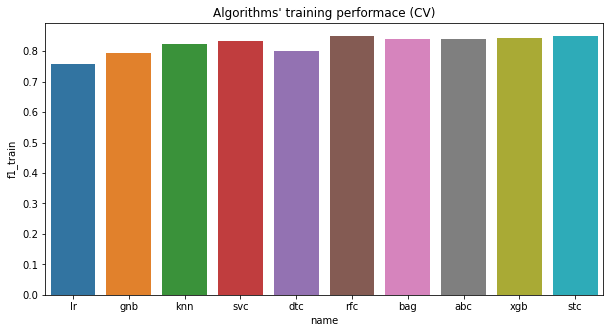

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sb.barplot(data = data, x = data['name'], y = data['f1_train'])
plt.title("Algorithms' training performace (CV)");

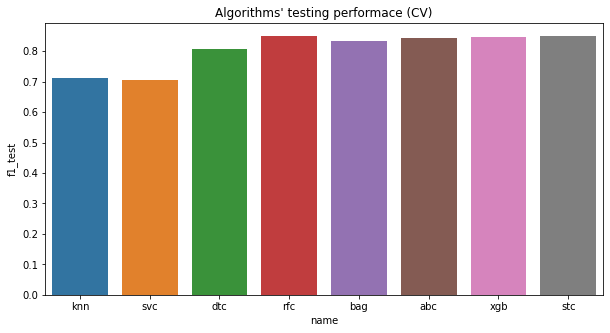

In [24]:
data1 = data[data['f1_train'] > 0.8]
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sb.barplot(data = data1, x = data1['name'], y = data1['f1_test'])
plt.title("Algorithms' testing performace (CV)");

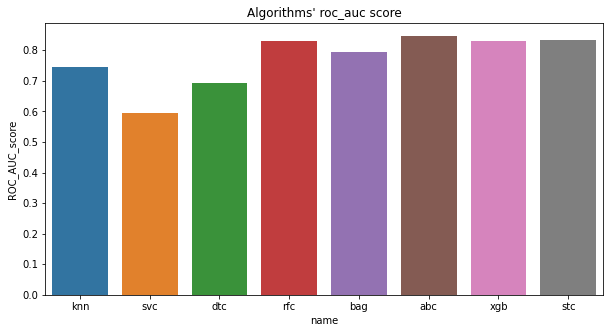

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sb.barplot(data = data1, x = data1['name'], y = data1['ROC_AUC_score'])
plt.title("Algorithms' roc_auc score");

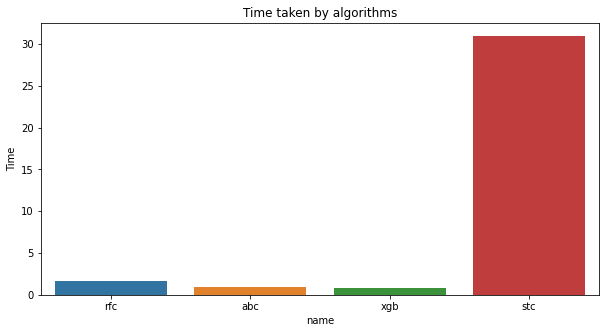

In [26]:
data2 = data1[(data1['name'] == 'rfc') | (data1['name'] == 'abc') | (data1['name'] == 'xgb') | (data1['name'] == 'stc')]
# data2 = data1[(data1['name'] == 'abc') | (data1['name'] == 'xgb')]
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sb.barplot(data = data2, x = data2['name'], y = data2['Time'])
plt.title("Time taken by algorithms");

###### 

### Visualising the Test set results 


 rfc
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2407
           1       0.68      0.50      0.57       593

    accuracy                           0.85      3000
   macro avg       0.78      0.72      0.74      3000
weighted avg       0.84      0.85      0.85      3000



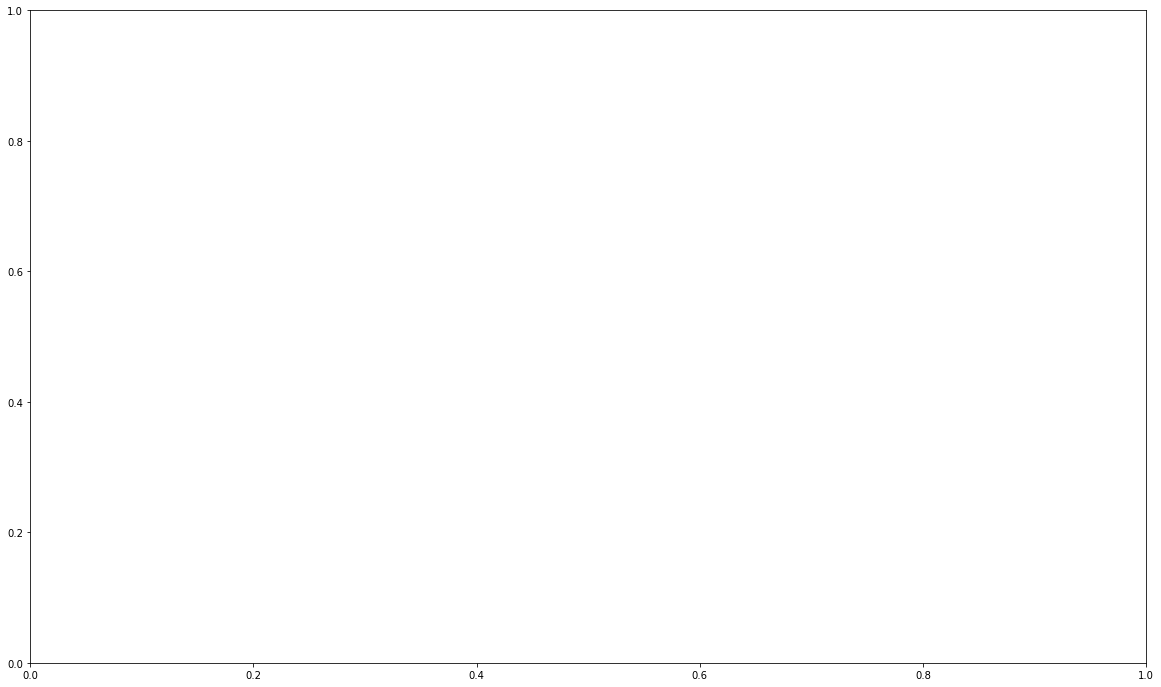

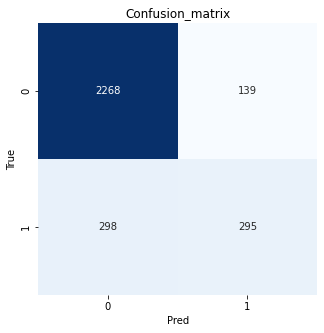

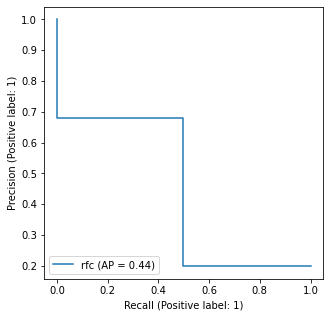


 abc
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2407
           1       0.70      0.47      0.56       593

    accuracy                           0.85      3000
   macro avg       0.79      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000



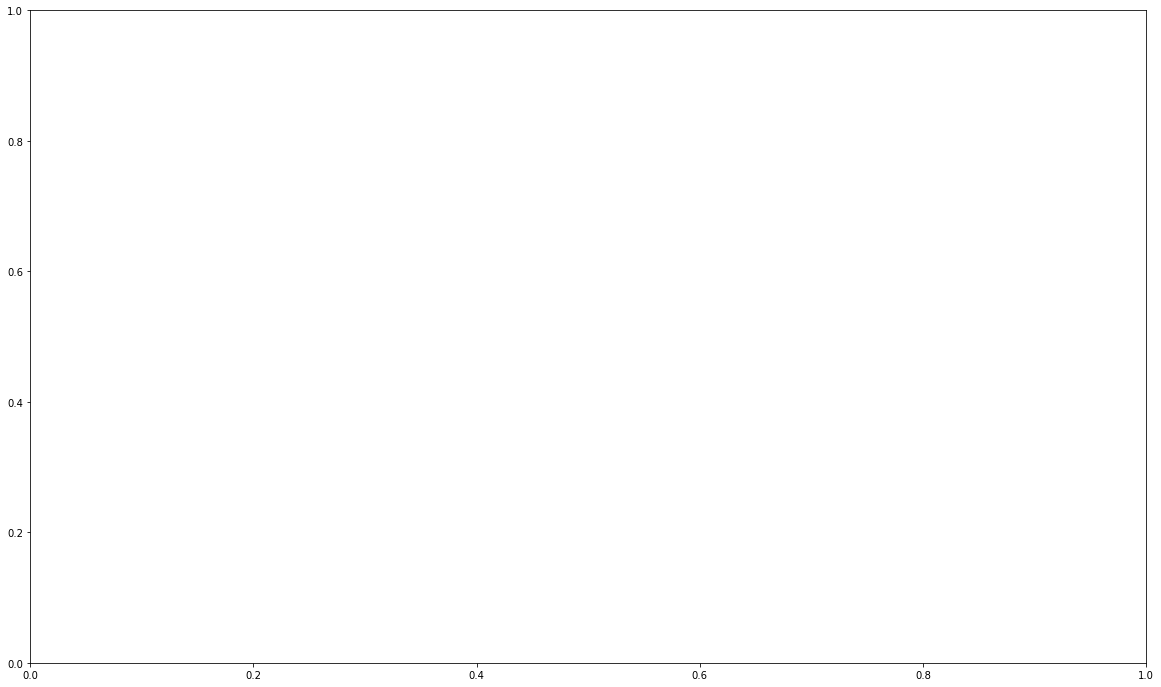

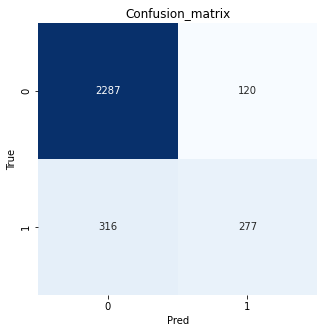

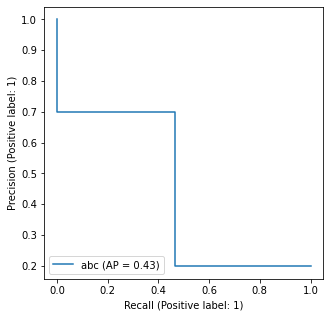


 xgb
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2407
           1       0.71      0.48      0.58       593

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



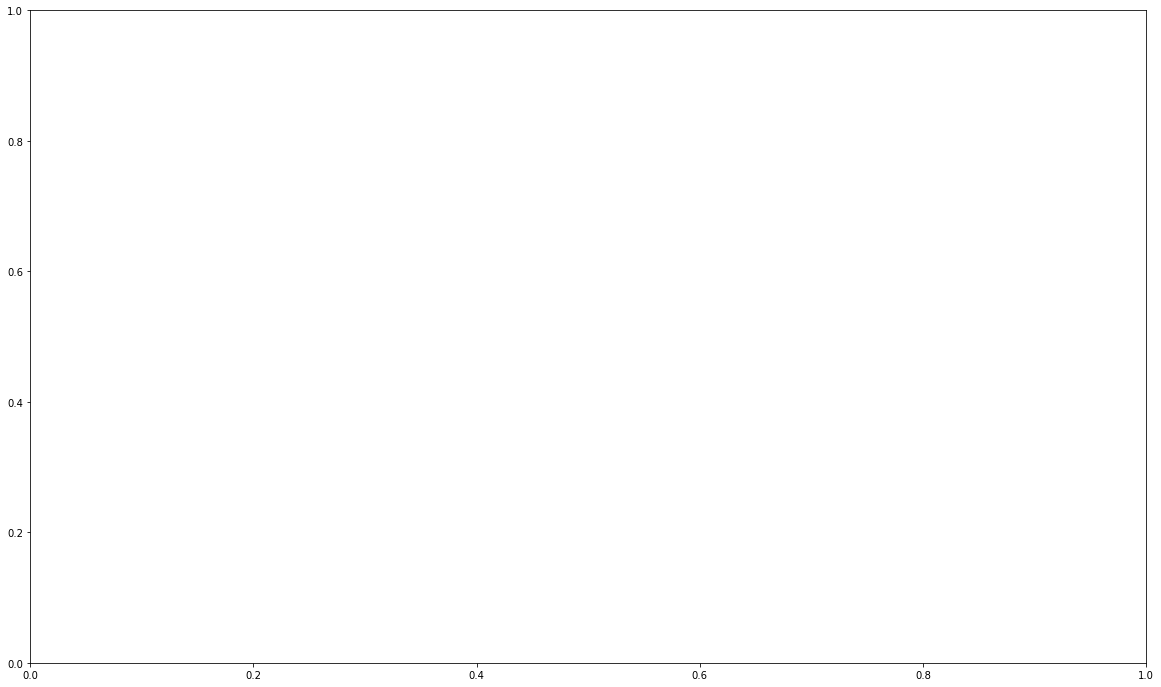

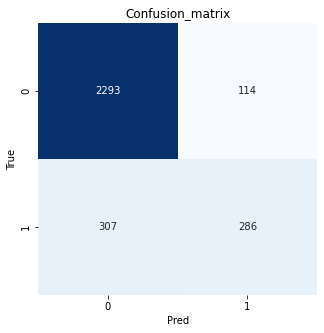

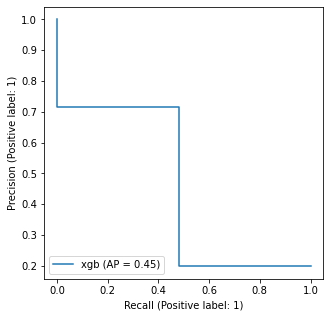

In [205]:
ln = ['rfc', 'abc', 'xgb']
an = [rfc, abc, xgb]
for i,j in (zip(ln, an)):
    print('\n',i)
    j.fit(X_train, y_train)
    pred = j.predict(X_test)
    print(classification_report(y_test, pred))
    
    classes = np.unique(y_test)
    fig, ax = plt.subplots()
    cm = confusion_matrix(y_test, pred, labels=classes)
    _, ax = plt.subplots(1, 1, figsize = (5,5))
    sb.heatmap(cm, annot=True, fmt='d', cmap = plt.cm.Blues, cbar = False)
    plt.xlabel('Pred')
    plt.ylabel('True')
    plt.title('Confusion_matrix')
#     plt.yticklabels(labels = classes, rotation = 0)
#     ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
#     ax.set_yticklabels(labels=classes, rotation=0)
    plt.show();
    
    _, ax = plt.subplots(1, 1, figsize = (5,5))
#     prec, recall, _ = precision_recall_curve(y_test, pred, pos_label = clf.classes_[1])
#     pr_display = PrecisionRecallDisplay(precision = prec, recall = recall).plot(ax = ax)
    display = PrecisionRecallDisplay.from_predictions(y_test, pred, name = i, ax = ax)
#     _ = display.ax_.set_title("2-class Precision-Recall curve")
    plt.show();

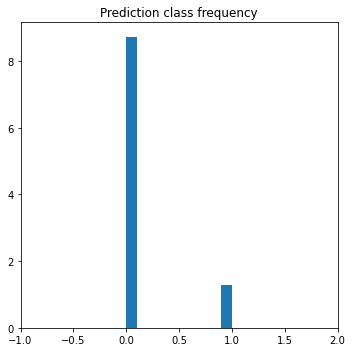

In [33]:
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test) 

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
ax.hist(y_pred, density = True, histtype = 'bar')
ax.set_title('Prediction class frequency')
plt.xlim(y_pred.min()-1, y_pred.max() + 1)  
fig.tight_layout()
plt.show();

# fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
# probability = abc.predict_proba(X_test)
# sb.histplot(probability);

In [229]:
X_names = ['Age', 'IsActiveMember', 'Balance', 'Gender', 'NumOfProducts', 'Geography', 'CreditScore']
dtf_train, dtf_test = train_test_split(df, 
                      test_size = 0.3)
X_train = dtf_train[X_names].values
y_train = dtf_train["Exited"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Exited"].values

### Lime tabular explainer at any instance

True: 0 --> Pred: 0 | Prob: 0.4895941768895787


[('Age > 44.00', 0.008812661733178972),
 ('0.00 < IsActiveMember <= 1.00', -0.004311554124585305),
 ('NumOfProducts <= 1.00', 0.0033671646685346575),
 ('0.00 < Gender <= 1.00', -0.0026339810409200075),
 ('CreditScore > 718.00', -0.0012106382655269346),
 ('Geography > 1.00', -0.0012033148486393858),
 ('Balance > 127543.72', 0.00013194716930729945)]

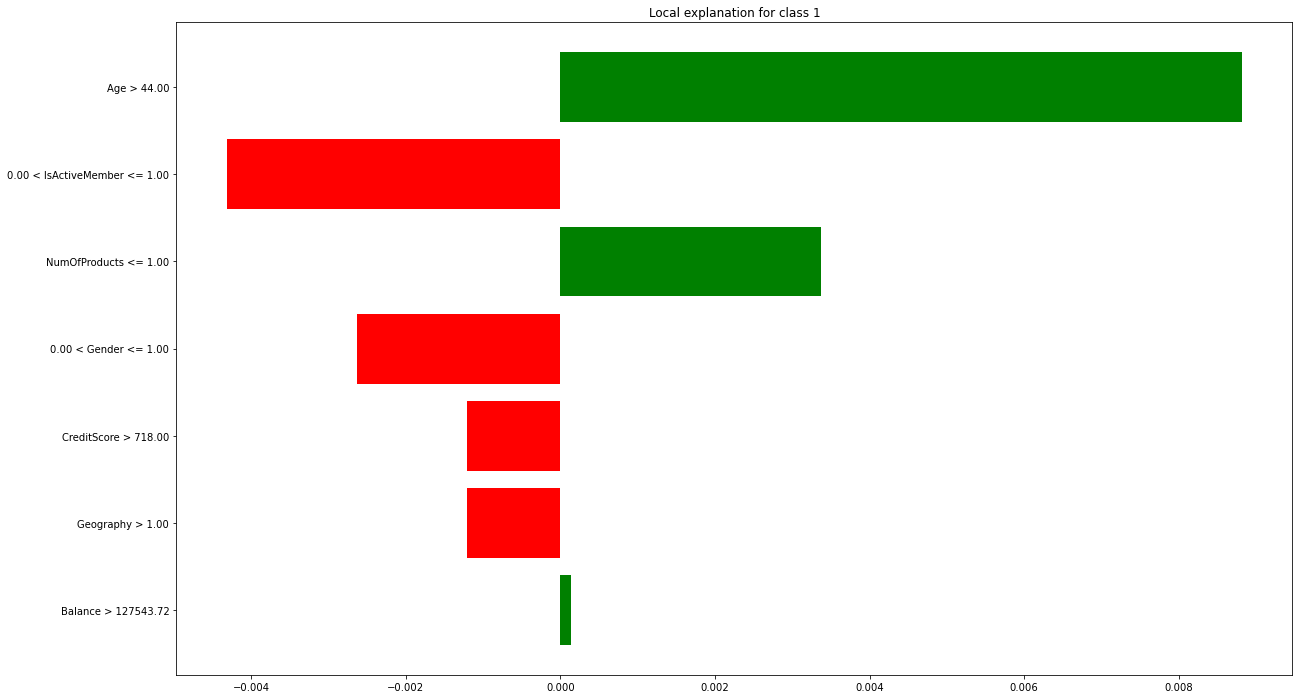

In [237]:
predicted_prob = abc.predict_proba(X_test)[:,1]
predicted = abc.predict(X_test)
print("True:", y_test[7], "--> Pred:", predicted[7], "| Prob:", np.max(predicted_prob[7]))
explainer = lime_tabular.LimeTabularExplainer(training_data = X_train, feature_names = X_names, class_names = np.unique(y_train), mode = "classification")
explained = explainer.explain_instance(X_test[7], abc.predict_proba, num_features = 7)
explained.as_pyplot_figure();
explained.show_in_notebook(show_table=True)
explained.as_list()

In [170]:
x = X_test[y_test == 1]
replace_values = {0 : 'France', 1 : 'Germany', 2 : 'Spain'}                                                                                          
x = x.replace({"Geography": replace_values})  
replace_values = {0 : 'Male', 1 : 'Female'}                                                                                          
x = x.replace({"Gender": replace_values}) 

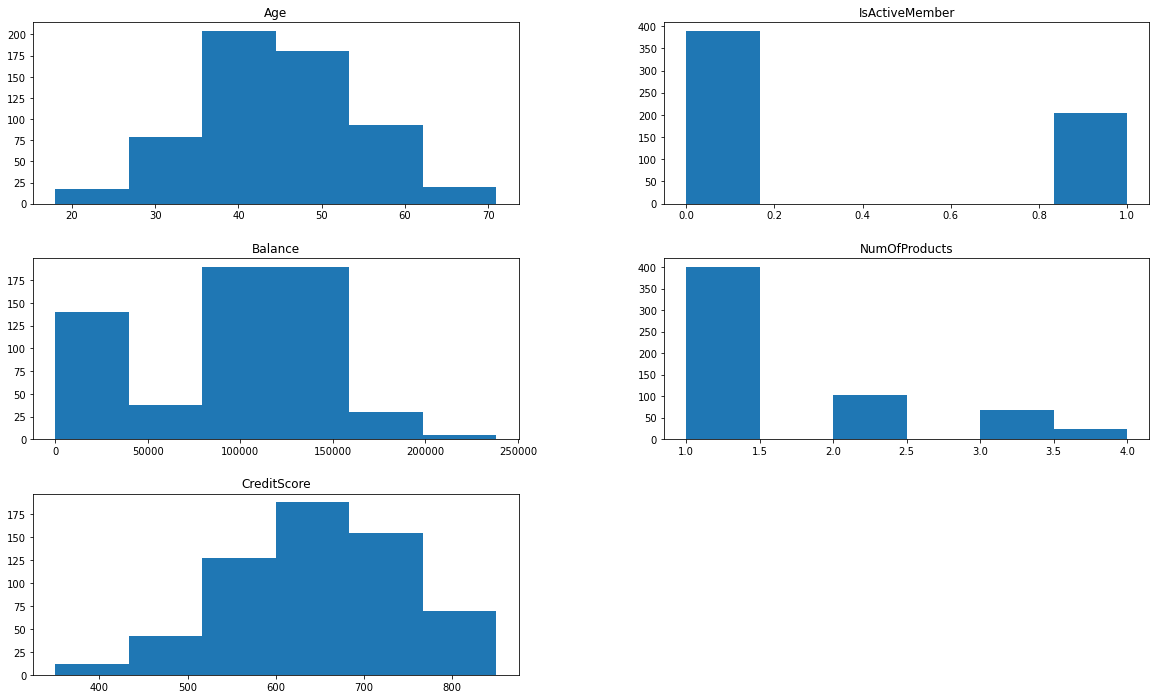

In [171]:
plt.rcParams["figure.figsize"] = [20,12]
x.hist(bins = 6, grid = False);

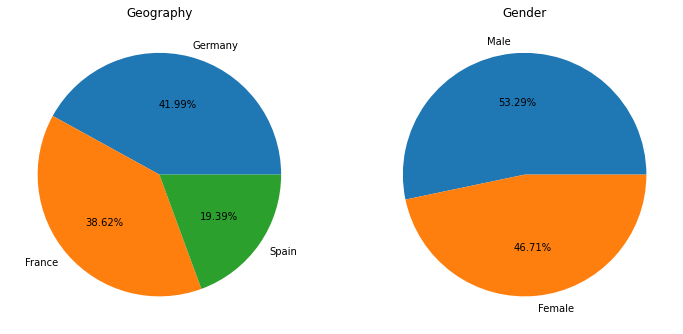

In [172]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
ax1.set_title('Geography')
percentage = x['Geography'].value_counts()
label = list(x['Geography'].value_counts().index)
ax1.pie(percentage, labels = label, autopct = '%0.2f%%')

ax2.set_title('Gender')
percentage = x['Gender'].value_counts()
label = list(x['Gender'].value_counts().index)
ax2.pie(percentage, labels = label, autopct = '%0.2f%%')

plt.show();

### Conclusion – Best model : AdaBoostClassifier is the best model for predicting customer attrition for the given dataset


### Business Insights: Special attention should be paid to attrition of customers of both genders having :
    1. Geography : Germany, France 
    2. Age group : [35-55]
    3. Inactive members
    4. Balance : [90,000 – 1,60,000]
    5. Credit score : [550 – 750]
    6. No. of products = 1

###### 